In [4]:
# ==========================================
# ✅ CIFAR-10 3클래스(개, 고양이, 말) 분류 CNN
# ==========================================

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ 데이터 로드
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# CIFAR-10 클래스 라벨
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [5]:
# 2️⃣ 필요한 클래스만 선택 (cat=3, dog=5, horse=7)
selected_classes = [3, 5, 7]

train_mask = np.isin(y_train, selected_classes)
test_mask = np.isin(y_test, selected_classes)

x_train = x_train[train_mask]
y_train = y_train[train_mask]
x_test = x_test[test_mask]
y_test = y_test[test_mask]



In [6]:
# 3️⃣ 라벨 재매핑 (cat→0, dog→1, horse→2)
label_map = {3:0, 5:1, 7:2}
y_train = np.array([label_map[y] for y in y_train])
y_test = np.array([label_map[y] for y in y_test])

# 4️⃣ 데이터 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 5️⃣ 모델 구성 (CNN)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 클래스 3개
])


In [7]:

# 6️⃣ 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 7️⃣ 학습
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4852 - loss: 0.9789 - val_accuracy: 0.6440 - val_loss: 0.7712
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6634 - loss: 0.7372 - val_accuracy: 0.6890 - val_loss: 0.6855
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7140 - loss: 0.6416 - val_accuracy: 0.7283 - val_loss: 0.6340
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7473 - loss: 0.5799 - val_accuracy: 0.7407 - val_loss: 0.6061
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7736 - loss: 0.5354 - val_accuracy: 0.7397 - val_loss: 0.6082
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8050 - loss: 0.4623 - val_accuracy: 0.7407 - val_loss: 0.6111
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8352 - loss: 0.4054 - val_accuracy: 0.7470 - val_loss: 0.6312
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8608 - loss: 0.3409 - val_accuracy: 0.

In [8]:
# 8️⃣ 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Test accuracy: {test_acc:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7553 - loss: 0.7172
✅ Test accuracy: 0.7473


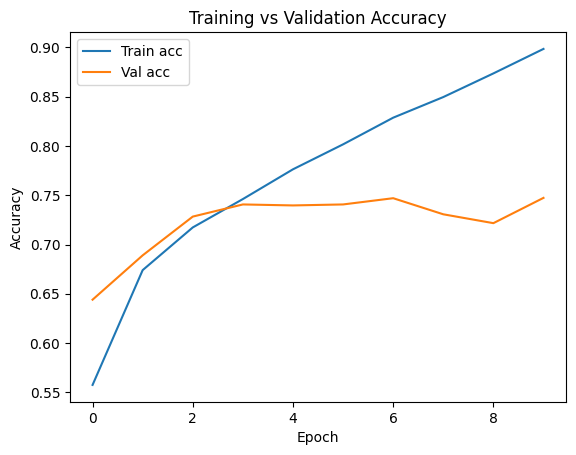

In [9]:
# 9️⃣ 학습 과정 시각화
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


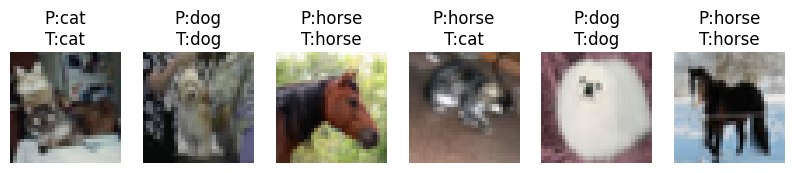

In [10]:

# 🔟 예시 이미지 예측
class_names = ['cat', 'dog', 'horse']
plt.figure(figsize=(10,3))
for i in range(6):
    idx = np.random.randint(0, len(x_test))
    img = x_test[idx]
    label = y_test[idx]
    pred = np.argmax(model.predict(img[np.newaxis, ...]))
    plt.subplot(1,6,i+1)
    plt.imshow(img)
    plt.title(f"P:{class_names[pred]}\nT:{class_names[label]}")
    plt.axis('off')
plt.show()